In [1]:
from forecast_models_teste import *

In [2]:
# Leitura do DataFrame
df = pd.read_csv('data.csv')

# Definição das features
numeric_features = [
    'parado', 'velocidade', 'vehicle_year', 'engine_power',
    'tank_capacity', 'vehicle_weight', 'o2_mean',
    'nox_mean'
]
categorical_features = [
    'vehicle_model', 'vehicle_pto_use', 'vehicle_gas_reduction',
    'vehicle_brand', 'vehicle_classification_euro',
]
features = categorical_features + numeric_features

# Definindo modelos
models = {
    'Decision Tree': DecisionTreeRegressor,
    'Linear Regression': LinearRegression,
    'Elastic Net': ElasticNet,
    'Bayesian Ridge': BayesianRidge,
    'Gradient Boosting': GradientBoostingRegressor,
    'MLP': MLPRegressor,
    'Lasso': Lasso,
    'Extra Trees': ExtraTreesRegressor,
    'Random Forest': RandomForestRegressor,
    'SVM': SVR
}

# Divisão dos dados por tipo de veículo
small = df[df['vehicle_type'] == 'smallTruck']
medium = df[df['vehicle_type'] == 'mediumTruck']

C:\Users\beatr\AppData\Local\Temp\ipykernel_22312\525554519.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['y_'].iloc[test] = y_
C:\Users\beatr\AppData\Local\Temp\ipykernel_22312\525554519.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['y_'].iloc[test] = y_
C:\Users\beatr\AppData\Local\Temp\ipykernel_22312\525554519.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['y_'].iloc[test] = y_
C:\Users\beatr\AppD

Small Vehicles Metrics:
               Model       MAE       MSE      RMSE       MAPE
0      Decision Tree  0.841148  1.509606  1.228660  27.231191
1  Linear Regression  0.546318  0.655680  0.809741  19.157297
2        Elastic Net  0.604581  0.742599  0.861742  20.889462
3     Bayesian Ridge  0.544575  0.655682  0.809742  19.146500
4  Gradient Boosting  0.574307  0.718162  0.847444  19.854283
5                MLP  0.543861  0.667165  0.816802  19.084790
6              Lasso  0.604581  0.742599  0.861742  20.889462
7        Extra Trees  0.583774  0.761663  0.872733  20.101028
8      Random Forest  0.567799  0.712562  0.844134  19.953074
9                SVM  0.539656  0.642122  0.801325  18.749500


C:\Users\beatr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\beatr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MAPE for ARIMA model: 19.80%


C:\Users\beatr\AppData\Local\Temp\ipykernel_22312\328417632.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  small_metrics_df = small_metrics_df.append({


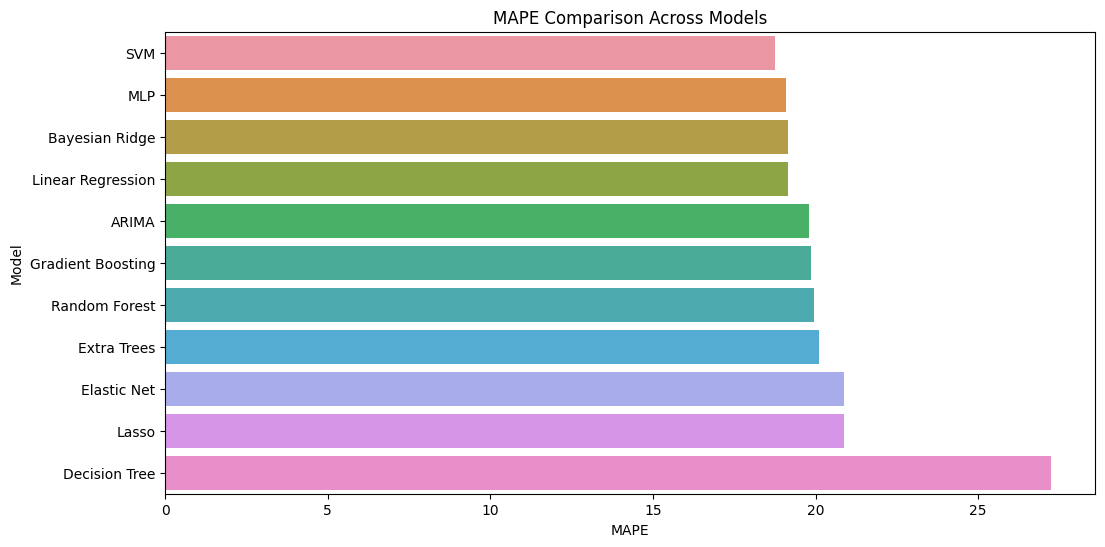

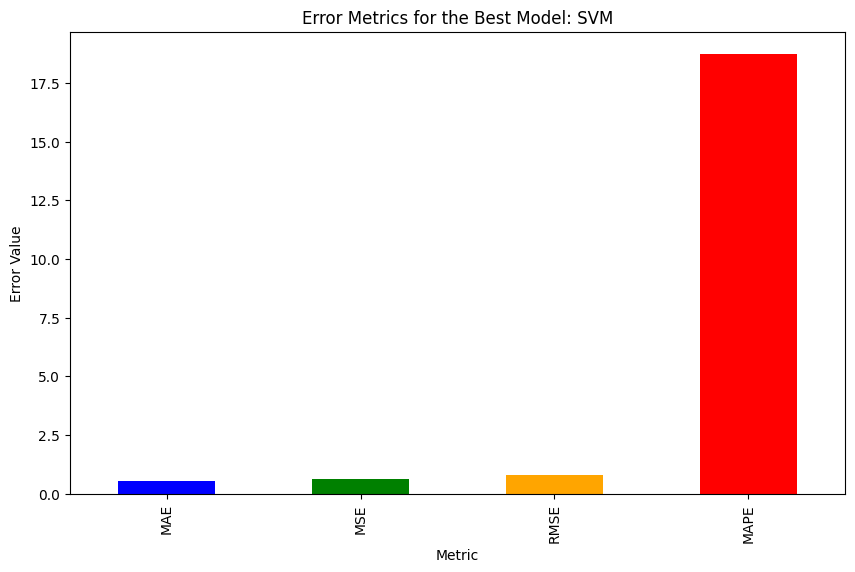

C:\Users\beatr\AppData\Local\Temp\ipykernel_22312\525554519.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['y_'] = model.predict(subset_data[numeric_features + categorical_features])
C:\Users\beatr\AppData\Local\Temp\ipykernel_22312\525554519.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['date'] = pd.to_datetime(subset_data['timestamp'], unit='ms')
C:\Users\beatr\AppData\Local\Temp\ipykernel_22312\525554519.py:160: SettingWithCopyWarning: 
A value is trying to be set o

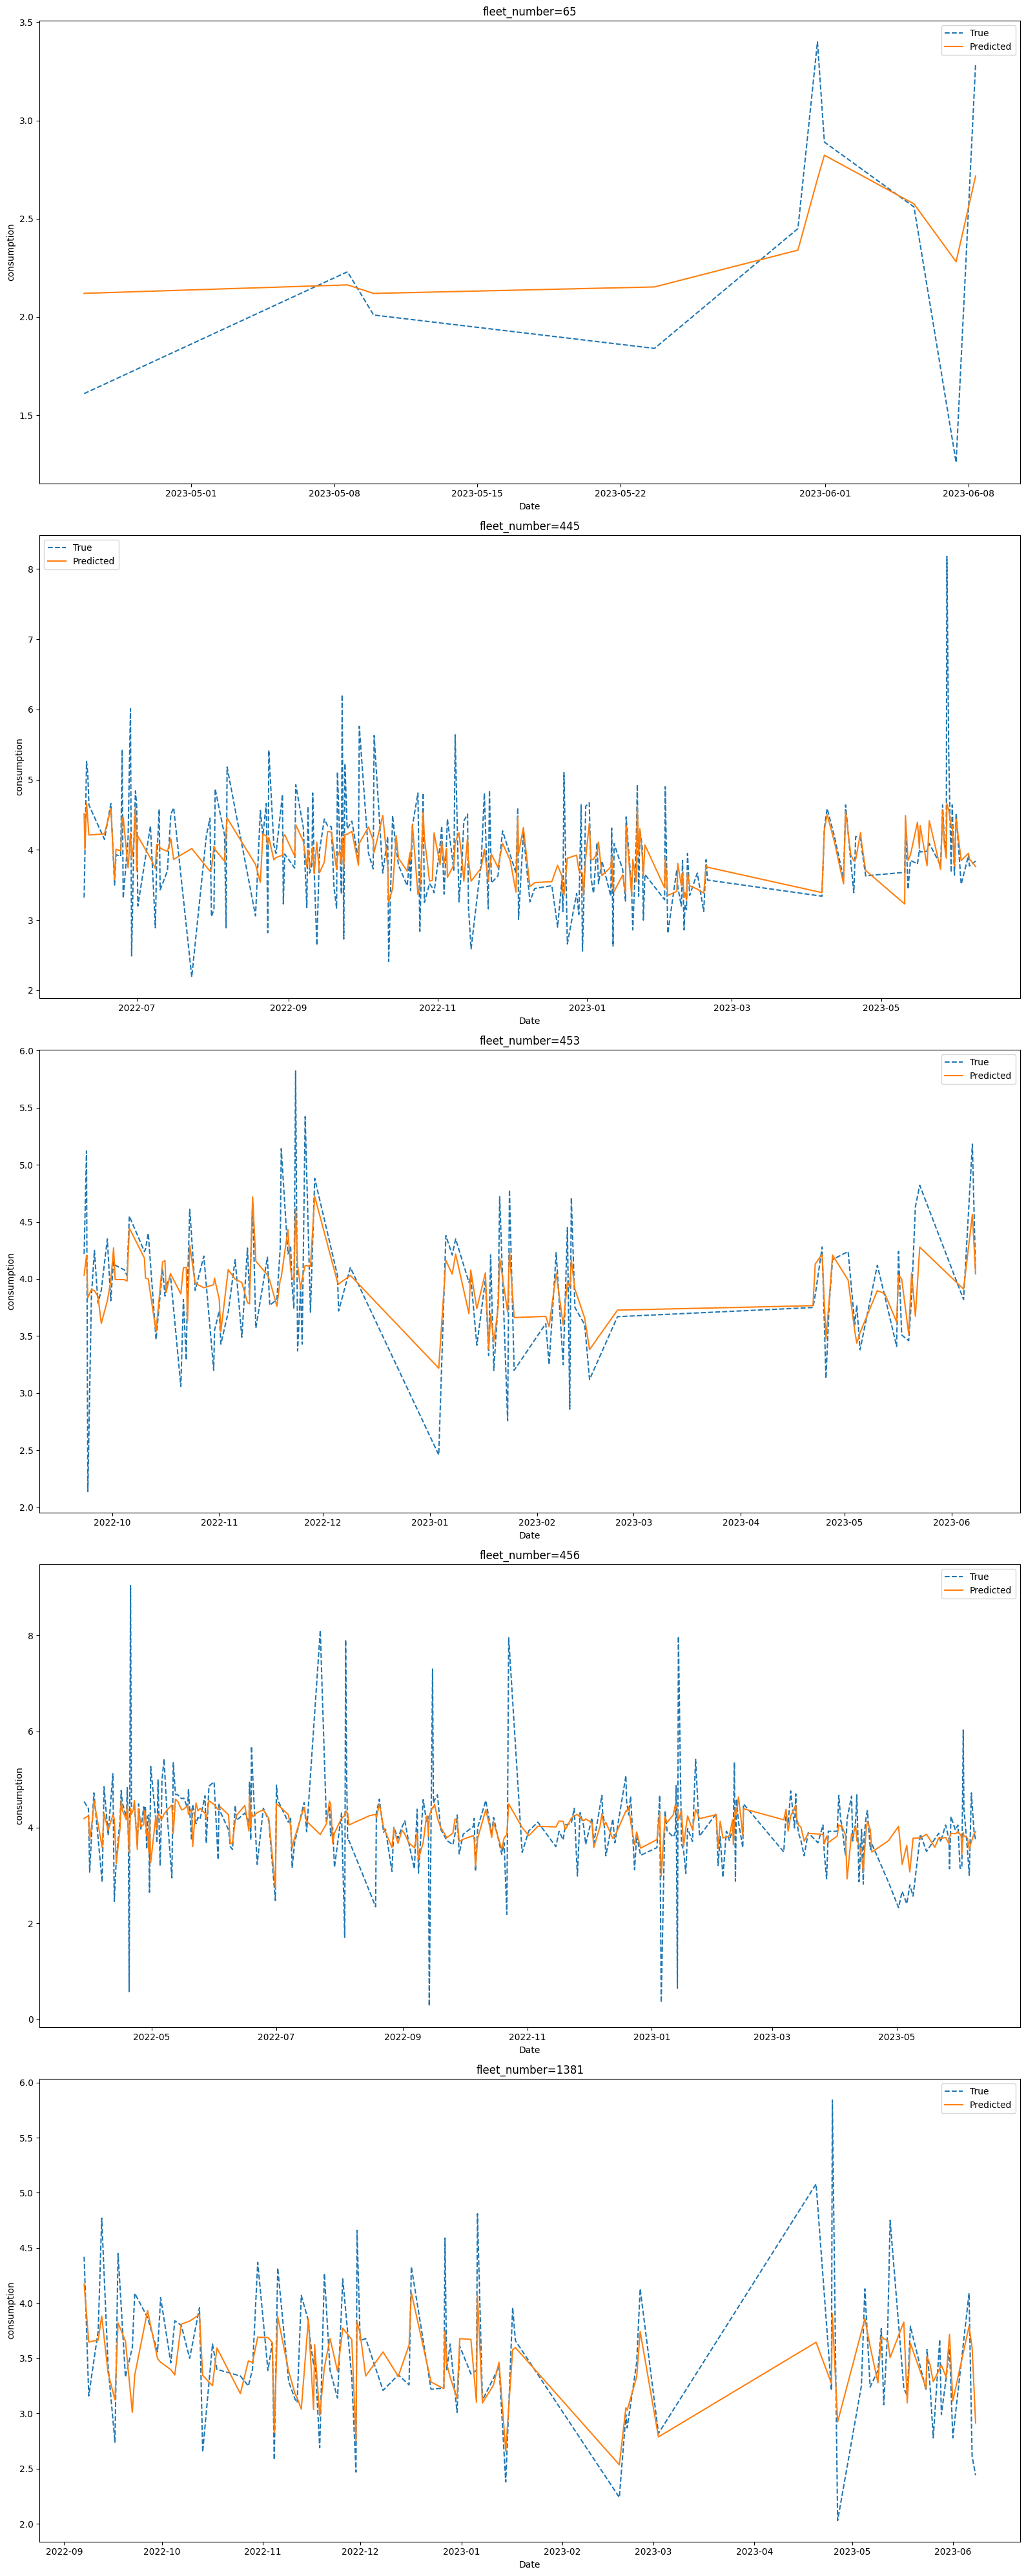

In [16]:
# Avaliação dos modelos para veículos pequenos
small_metrics_df = train_and_evaluate_models(models, small, numeric_features, categorical_features, target='consumption', break_variable='fleet_number')
print('Small Vehicles Metrics:')
print(small_metrics_df)

# Avaliação do modelo ARIMA para veículos pequenos
arima_mape_small = cross_val_metrics(None, small[numeric_features + categorical_features], small['consumption'], arima=True, seasonal=False)
mape_value_small = arima_mape_small[3]
print(f'MAPE for ARIMA model: {mape_value_small:.2f}%')

# Adicionando o resultado do modelo ARIMA ao DataFrame
small_metrics_df = small_metrics_df.append({
    'Model': 'ARIMA',
    'MAE': None,
    'MSE': None,
    'RMSE': None,
    'MAPE': mape_value_small
}, ignore_index=True)

# Plotar o gráfico comparativo do MAPE dos modelos para veículos pequenos
plot_mape_comparison(small_metrics_df)

# Plotar o gráfico de erro do melhor modelo para veículos pequenos
plot_best_model_error(small_metrics_df)

# Escolhendo o melhor modelo para veículos pequenos
best_model_name = small_metrics_df.iloc[small_metrics_df['MAPE'].idxmin()]['Model']

if best_model_name == 'ARIMA':
    order, seasonal_order = pm.auto_arima(small['consumption'], seasonal=False).get_params()['order'], None
    small_model = SARIMAX(endog=small['consumption'], order=order, seasonal_order=seasonal_order)
else:
    small_model = pipeline_generator(models[best_model_name](), numeric_features, categorical_features)

# Plotar o gráfico da previsão do consumo por break_variable para veículos pequenos
plot_target_by_break_variable(small, small_model, numeric_features, categorical_features, target='consumption', break_variable='fleet_number')


C:\Users\beatr\AppData\Local\Temp\ipykernel_22312\525554519.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['y_'].iloc[test] = y_
C:\Users\beatr\AppData\Local\Temp\ipykernel_22312\525554519.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['y_'].iloc[test] = y_
C:\Users\beatr\AppData\Local\Temp\ipykernel_22312\525554519.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['y_'].iloc[test] = y_
C:\Users\beatr\AppD


Medium Vehicles Metrics:
               Model       MAE       MSE      RMSE       MAPE
0      Decision Tree  0.655420  0.994915  0.997454  31.869819
1  Linear Regression  0.455436  0.527134  0.726040  24.046957
2        Elastic Net  0.551253  0.624242  0.790090  29.773105
3     Bayesian Ridge  0.457872  0.528825  0.727203  24.335293
4  Gradient Boosting  0.482716  0.591758  0.769258  25.045339
5                MLP  0.453935  0.525582  0.724970  24.715319
6              Lasso  0.551253  0.624242  0.790090  29.773105
7        Extra Trees  0.489242  0.592662  0.769845  25.129774
8      Random Forest  0.477448  0.584393  0.764456  24.309135
9                SVM  0.439293  0.506631  0.711780  23.633123


C:\Users\beatr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\beatr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\beatr\AppData\Local\Temp\ipykernel_22312\3175159975.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  medium_metrics_df = medium_metrics_df.append({


MAPE for ARIMA model: 31.83%


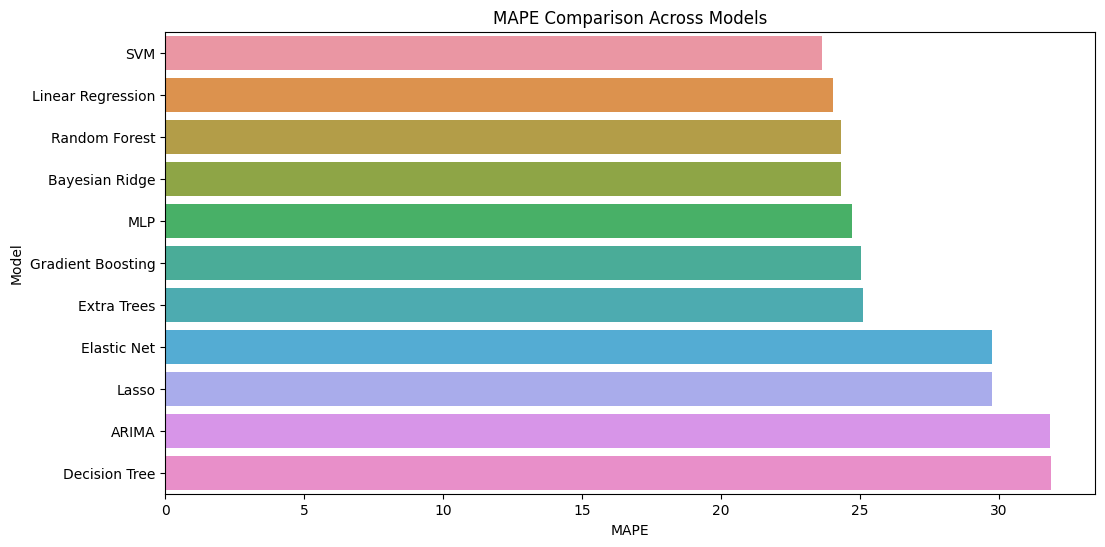

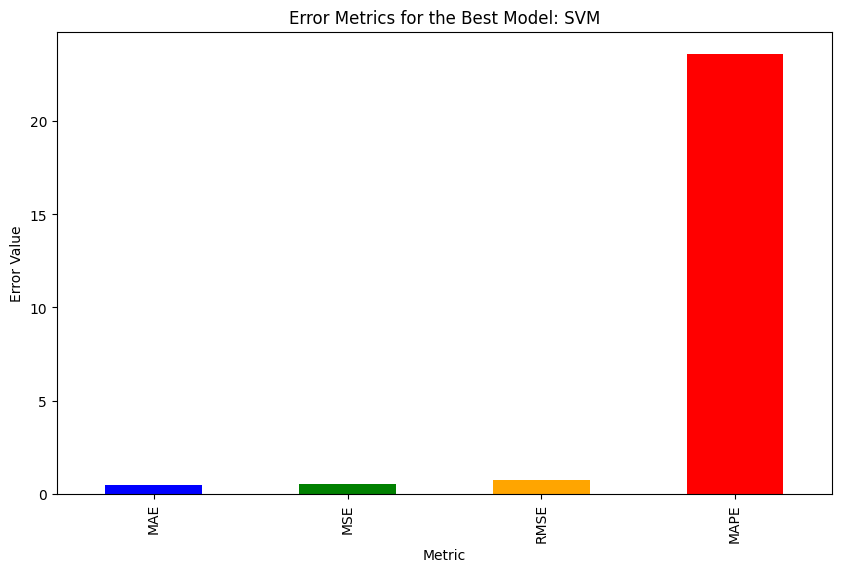

C:\Users\beatr\AppData\Local\Temp\ipykernel_22312\525554519.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['y_'] = model.predict(subset_data[numeric_features + categorical_features])
C:\Users\beatr\AppData\Local\Temp\ipykernel_22312\525554519.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['date'] = pd.to_datetime(subset_data['timestamp'], unit='ms')
C:\Users\beatr\AppData\Local\Temp\ipykernel_22312\525554519.py:160: SettingWithCopyWarning: 
A value is trying to be set o

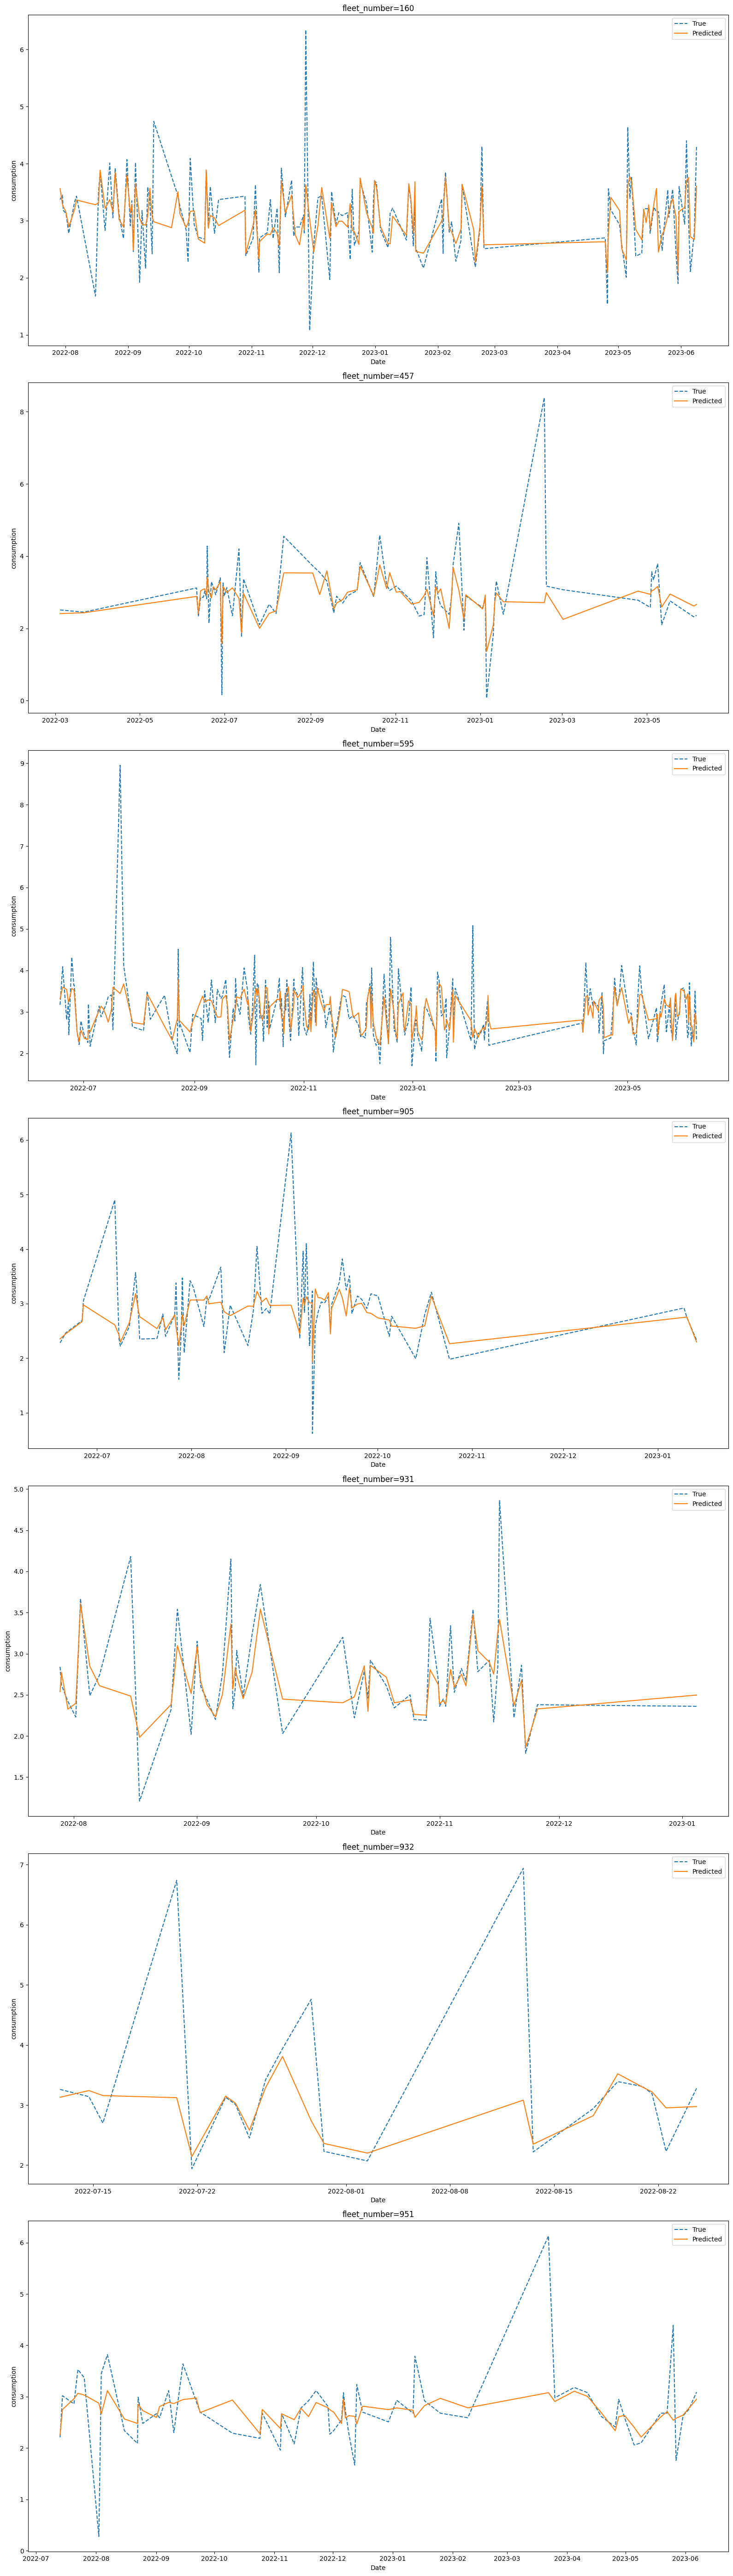

In [17]:
# Avaliação dos modelos para veículos médios
medium_metrics_df = train_and_evaluate_models(models, medium, numeric_features, categorical_features, target='consumption', break_variable='fleet_number')
print('\nMedium Vehicles Metrics:')
print(medium_metrics_df)

# Avaliação do modelo ARIMA para veículos pequenos
arima_mape_medium = cross_val_metrics(None, medium[numeric_features + categorical_features], medium['consumption'], arima=True, seasonal=False)
mape_value_medium = arima_mape_medium[3]
print(f'MAPE for ARIMA model: {mape_value_medium:.2f}%')

# Adicionando o resultado do modelo ARIMA ao DataFrame
medium_metrics_df = medium_metrics_df.append({
    'Model': 'ARIMA',
    'MAE': None,
    'MSE': None,
    'RMSE': None,
    'MAPE': mape_value_medium
}, ignore_index=True)

# Plotar o gráfico comparativo do MAPE dos modelos para veículos médios
plot_mape_comparison(medium_metrics_df)

# Plotar o gráfico de erro do melhor modelo para veículos médios
plot_best_model_error(medium_metrics_df)

# Escolhendo o melhor modelo para veículos médios
best_model_name = medium_metrics_df.iloc[medium_metrics_df['MAPE'].idxmin()]['Model']

if best_model_name == 'ARIMA':
    order, seasonal_order = pm.auto_arima(medium['consumption'], seasonal=False).get_params()['order'], None
    medium_model = SARIMAX(endog=medium['consumption'], order=order, seasonal_order=seasonal_order)
else:
    medium_model = pipeline_generator(models[best_model_name](), numeric_features, categorical_features)

# Plotar o gráfico da previsão do consumo por break_variable para veículos médios
plot_target_by_break_variable(medium, medium_model, numeric_features, categorical_features, target='consumption', break_variable='fleet_number')